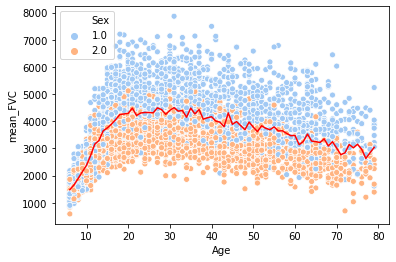

In [1]:
"""
Preprocessing of NHANES spirometry data
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read in data
spirometry = pd.read_sas('SPX_G.XPT')
demographics = pd.read_sas('DEMO_G.XPT')
bmi = pd.read_sas('BMX_G.XPT')
exhaledno = pd.read_sas('ENX_G.XPT')

# subset data to include only the necessary features for filtering and analysis
# 1 is male, 2 is female for sex
spirometry_sub = spirometry[['SPXNFVC', 'SPXNFEV1', 'SEQN', 
                             'ENQ010', 'ENQ020', 'SPQ040', 'ENQ100', 
                             'SPQ050', 'SPQ060','SPQ070B', 'SPQ100']]
demographics_sub = demographics[['RIDAGEYR', 'RIAGENDR', 'SEQN']]
bmi_sub = bmi[['BMXHT', 'BMXWT', 'SEQN']]
exhaledno_sub = exhaledno[['SEQN', 'ENQ040', 'ENQ090']]

# merge data
df_merged = pd.merge(spirometry_sub, demographics_sub, on='SEQN', how='inner')
df_merged = pd.merge(df_merged, bmi_sub, on='SEQN', how='inner')
df_merged = pd.merge(df_merged, exhaledno_sub, on='SEQN', how='inner')

# rename columns
df_merged.rename(columns = {'SPXNFVC': 'FVC', 'SPXNFEV1': 'FEV1',
                        'RIDAGEYR': 'Age', 'RIAGENDR': 'Sex', 
                        'BMXHT': 'Height', 'BMXWT': 'Weight'}, inplace=True)

# filter out entries where spirometry may be abnormal
# entries prior to filtering: 7495
df_merged = df_merged[df_merged['ENQ010'] !=1] # breathing problem requiring oxygen
#7454 entries
df_merged = df_merged[df_merged['ENQ020']!=1] # problem taking a deep breath
#7388 entries
df_merged = df_merged[df_merged['SPQ040']!=1] # chest/abdominal surgery ever
#6346 entries
df_merged = df_merged[df_merged['SPQ050']!=1] # chest abdominal surgery in last 3 months
#6346 entries
df_merged = df_merged[df_merged['SPQ060']!=1] # TB in last year
#6324 entries
df_merged = df_merged[df_merged['SPQ070B']!=2] # ever been told of a collapsed lung
#6295 entries
df_merged = df_merged[df_merged['SPQ100']!=1] # hemoptysis in past month
#6276 entries
df_merged = df_merged[df_merged['ENQ100']!=1] # respiratory illness in last 7 days
#5219 entries
df_merged = df_merged[df_merged['ENQ040']!=1] # smoked in the last hour
# 5073 entries
df_merged = df_merged[df_merged['ENQ090']!=1] # used oral/inhaled steroids within last 2 days (often used in asthma/COPD)
# 4950 entries

#print(len(df_merged))

# create dataset that only includes features relevant to analysis
subset  = df_merged[['SEQN', 'Age', 'Sex', 'Weight', 'Height', 'FEV1', 'FVC']]

# remove missing values
subset = subset.dropna()
# 4407 entries

# plot
estimates = subset.groupby('Age')[['FVC', 'FEV1']].mean()
estimates.rename(columns={'FVC':'mean_FVC', 'FEV1':'mean_FEV1'}, inplace=True)

#sns.scatterplot(x=subset['Age'], y=subset['FEV1'], hue=subset['Sex'], palette='pastel')
#sns.lineplot(x=estimates.index.values, y=estimates['mean_FEV1'], color='red')

sns.scatterplot(x=subset['Age'], y=subset['FVC'], hue=subset['Sex'], palette='pastel')
sns.lineplot(x=estimates.index.values, y=estimates['mean_FVC'], color='red')

